In [1]:
import numpy as np
import pandas as pd
#For visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("Diwali Sales Data.csv", encoding = "unicode_escape")

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


***DATA CLEANING***


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


***So as per the above info we are going to remove all the unvalid columns and also tackle the na values***

In [4]:
df.drop(["Status","unnamed1"],axis=1, inplace=True)

***Below are the rows with null values***

In [5]:
df[df['Amount'].isna()]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN
14,1003858,Cano,P00293742,M,46-50,46,1,Madhya Pradesh,Central,Hospitality,Auto,3,NaN
16,1005447,Amy,P00275642,F,46-50,48,1,Andhra Pradesh,Southern,IT Sector,Auto,3,NaN
109,1005265,Sakshi,P00296242,F,46-50,48,1,Delhi,Central,Banking,Footwear & Shoes,1,NaN
111,1005261,Apoorva,P00057942,F,36-45,41,1,Delhi,Central,IT Sector,Footwear & Shoes,2,NaN
184,1005538,Kartik,P00269542,F,46-50,49,1,Karnataka,Southern,Banking,Footwear & Shoes,1,NaN
293,1000326,Jonathan,P00120542,M,51-55,53,0,Gujarat,Western,IT Sector,Footwear & Shoes,3,NaN
344,1002507,Lakshmi,P00045842,F,26-35,35,1,Gujarat,Western,Chemical,Furniture,1,NaN
345,1004498,Srishti,P00030842,F,51-55,55,0,Delhi,Central,Textile,Footwear & Shoes,1,NaN
452,1004601,Gaurav,P00014442,F,36-45,40,1,Madhya Pradesh,Central,Hospitality,Food,4,NaN


In [7]:
df["Amount"]=df["Amount"].fillna(df["Amount"].mean())

In [6]:
df.loc[[14,109]]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
14,1003858,Cano,P00293742,M,46-50,46,1,Madhya Pradesh,Central,Hospitality,Auto,3,NaN
109,1005265,Sakshi,P00296242,F,46-50,48,1,Delhi,Central,Banking,Footwear & Shoes,1,NaN


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


***Data Analysis***

In [33]:
df.head()


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


Text(0.5, 1.0, 'Count of operation by Gender')

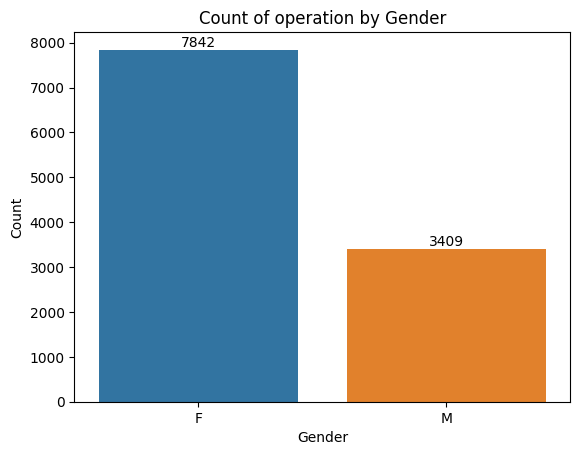

In [37]:
ax = sns.countplot(x="Gender",hue="Gender", data=df)

for bar in ax.containers:
    ax.bar_label(bar)
ax.set_xlabel("Gender")
ax.set_ylabel("Count")
ax.set_title("Count of operation by Gender")



In [52]:
df.groupby(["Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)

,Gender,Amount
0,F,74335856.43
1,M,31913276.00


Text(0.5, 1.0, 'Sales observation between genders')

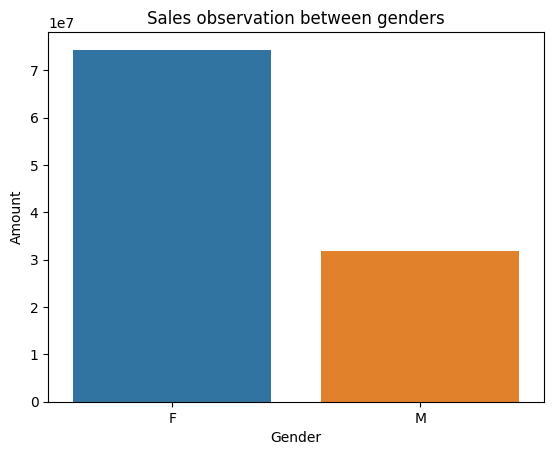

In [60]:
df.groupby(["Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sales_div=df.groupby(["Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
ax=sns.barplot(x="Gender",y="Amount",hue="Gender",data=sales_div)
ax.set_xlabel("Gender")
ax.set_ylabel("Amount")
ax.set_title("Sales observation between genders")

Text(0.5, 1.0, 'Count of sales as per gender')

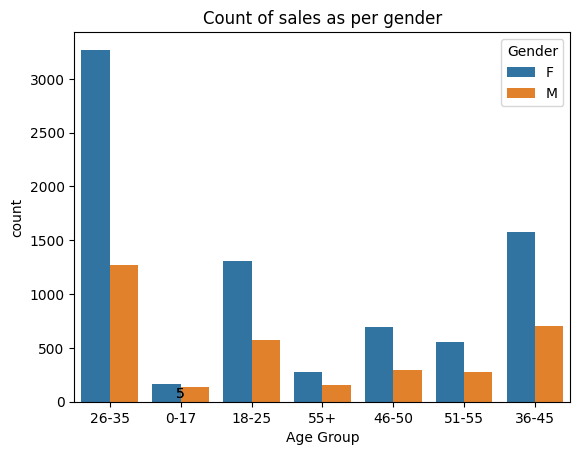

In [64]:
ax=sns.countplot(data=df,x="Age Group",hue="Gender")
for bar in ax.containers:
    ax.bar_label(bars)
ax.set_title("Count of sales as per gender")

Text(0.5, 1.0, 'Observation of spending Amount as per Age Group')

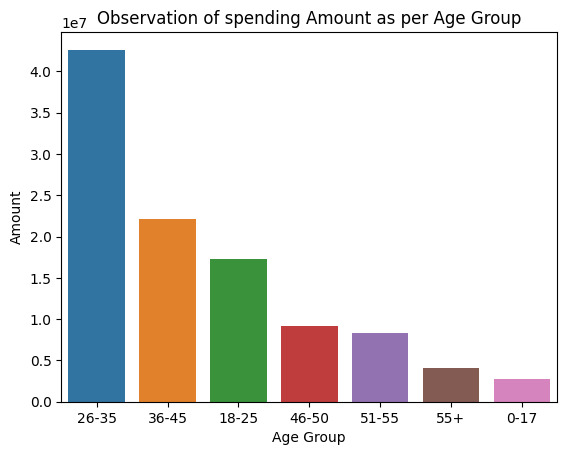

In [8]:
sales_age=df.groupby(["Age Group"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
ax=sns.barplot(data=sales_age,x="Age Group",y="Amount",hue="Age Group")
ax.set_title("Observation of spending Amount as per Age Group")


***Above bar shows that the major age group that spend most amunt is between 26-35***

In [11]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [12]:
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0


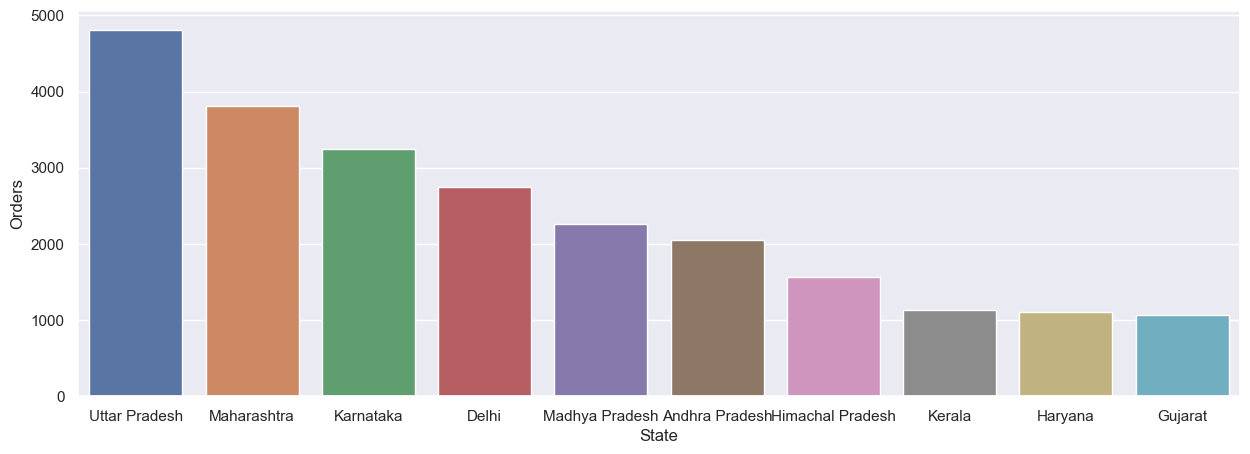

In [32]:
df_state=df.groupby(["State"],as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False).head(10)
sns.set(rc={"figure.figsize":(15,5)})
ax=sns.barplot(data=df_state,x="State",y="Orders",hue="State")

***From above bar we can see that UP and Maharastra have highest no. of orders***

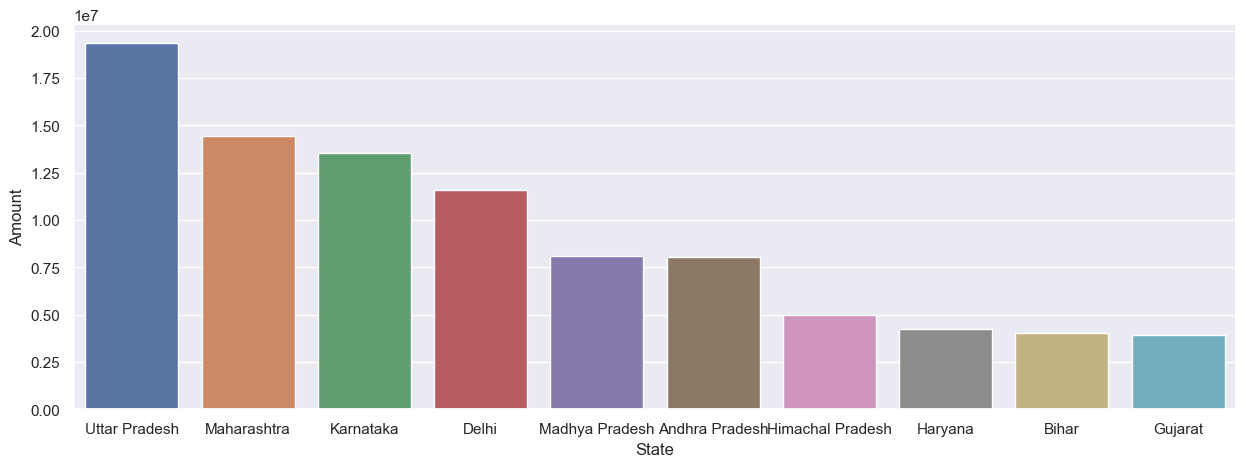

In [31]:
df_state=df.groupby(["State"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(10)
sns.set(rc={"figure.figsize":(15,5)})
ax=sns.barplot(data=df_state,x="State",y="Amount",hue="State")

***So from above bars we can see that kerla have higher order then haryana by the amount spend by hariyana is more then kerela***

In [35]:
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0


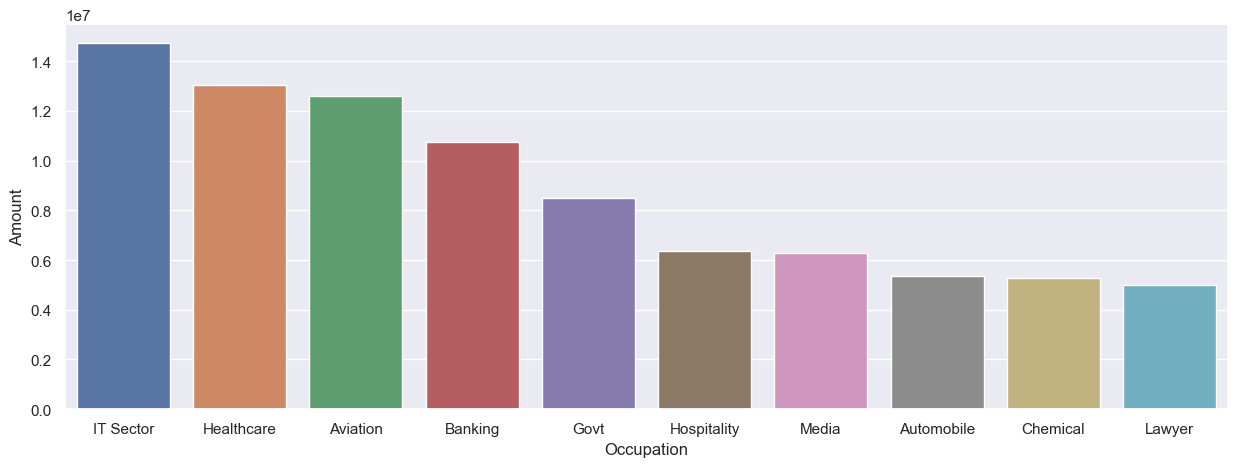

In [41]:
df_oce=df.groupby(["Occupation"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(10)
sns.set(rc={"figure.figsize":(15,5)})
ax=sns.barplot(data=df_oce,x="Occupation",y="Amount",hue="Occupation")

***From the above we can see the most order were make by the persons who works in IT Sector,Healthcare,Aviation***

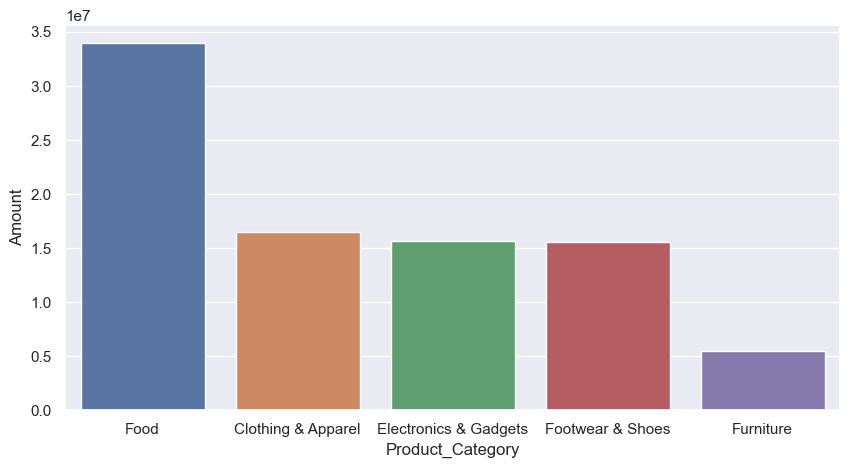

In [47]:
df_oce=df.groupby(["Product_Category"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(5)
sns.set(rc={"figure.figsize":(10,5)})
ax=sns.barplot(data=df_oce,x="Product_Category",y="Amount",hue="Product_Category")

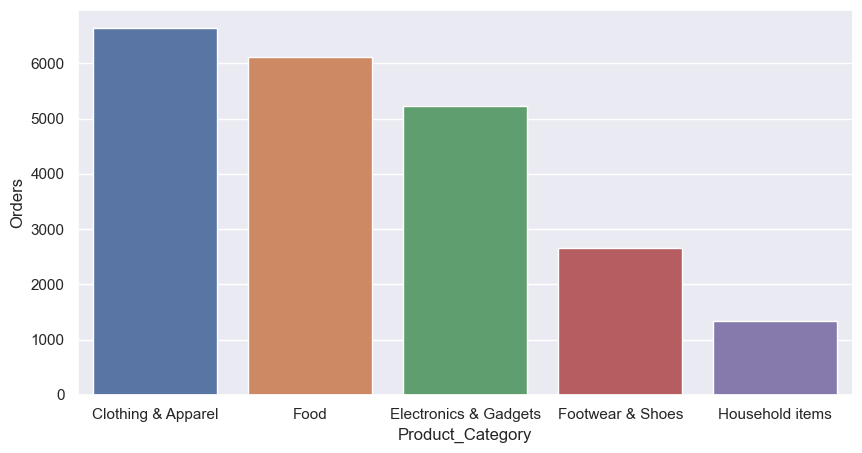

In [48]:
df_oce=df.groupby(["Product_Category"],as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False).head(5)
sns.set(rc={"figure.figsize":(10,5)})
ax=sns.barplot(data=df_oce,x="Product_Category",y="Orders",hue="Product_Category")

***The above two graph shows that the no. of orders of clothings&Apparel are high but the spending on food was to high then clothing & Apparel***

***Conclusion :***

**The data analysis reveals that the highest number of orders were placed by females, particularly in the age group of 26-35. Uttar Pradesh and Maharashtra stand out as states with the most orders, but Kerala exhibits the highest spending. Occupations in IT Sector, Healthcare, and Aviation show the highest spending patterns. While Clothing & Apparel receives the most orders, the Food category commands significantly higher spending. These insights suggest potential areas for targeted marketing and business strategies to optimize sales and customer engagement.**